In [1]:
!pip install geneticalgorithm
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.18ubuntu0.18.04.1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.18ubuntu0.18.04.1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[no

# Evolution for Rule priority

In [1]:
rules = ["l", "u", "c", "t", "TN", "zN", "ZN", "[", "]", "$X", "^X", "DN", "iNX", "oNX", "}", "{", "r", "sXY"]
rules_rev = {
    "l": 0, "u": 1, "c": 2, "t": 3, "TN": 4, "zN": 5, "ZN": 6, 
    "[": 7, "]": 8, "$X": 9, "^X": 10, "DN": 11, "iNX": 12, "oNX": 13, 
    "}": 14, "{": 15, "r": 16, "sXY": 17
}

def are_all_unique(numbers):
    return len(numbers) == len(set(numbers))

def rearrange_rules_by_priority(priorities, rules):
    if len(priorities) != 18 or len(rules) != 18:
        return "The list of numbers and rules must both contain exactly 19 elements."
    
    # Create a list of tuples where each tuple is (priority number, rule)
    numbered_rules = list(zip(priorities, rules))
    
    # Sort the list of tuples by the first element in each tuple (the priority number)
    sorted_numbered_rules = sorted(numbered_rules)
    
    # Extract the rules from the sorted list of tuples
    sorted_rules = [rule for _, rule in sorted_numbered_rules]
    
    return sorted_rules


In [2]:
import time
from datetime import timedelta


def run_experiment_hac(rule_priorities):
    sorted_rules = rearrange_rules_by_priority(rule_priorities, rules)

    # Writing to a file
    file_path = 'rules_priority.txt'
    with open(file_path, 'w') as file:
        file.write(f":\n")
        for rule in sorted_rules:
            file.write(f"{rule}\n")

    start_time = time.time()    
    
    !python3 test_script.py --distance_matrix_precomputed --directory_rules R0_DIRECTORY_RULES --directory_wordlists 1_DIRECTORY_WORDLISTS --directory_passwords 2_DIRECTORY_PASSWORDS --clustering_parameters params-hac.txt --test_hac >> experiment.log
    
    end_time = time.time()
    execution_time = end_time - start_time
    execution_time_delta = timedelta(seconds=execution_time)

    outfile_name = "dbscan_statistics.csv"
    avg_hit_rate = 0.0
    
    with open(outfile_name, 'r') as file:
        next(file)  # Skip the header
        for line in file:
            data = line.strip().split(',')
            avg_hit_rate_percentage = data[3]  # The 'Average hit rate' is the 4th field
            avg_hit_rate = float(avg_hit_rate_percentage.rstrip('%')) / 100

    print("RULES="+str(sorted_rules))
    print("HAC | AVG hit rate: " + str(avg_hit_rate) + " | execution: " + str(execution_time_delta))
    return avg_hit_rate


def run_experiment_dbscan(rule_priorities):
    sorted_rules = rearrange_rules_by_priority(rule_priorities, rules)

    # Writing to a file
    file_path = 'rules_priority.txt'
    with open(file_path, 'w') as file:
        file.write(f":\n")
        for rule in sorted_rules:
            file.write(f"{rule}\n")

    start_time = time.time()    
    
    !python3 test_script.py --directory_rules R0_DIRECTORY_RULES --directory_wordlists 1_DIRECTORY_WORDLISTS --directory_passwords 2_DIRECTORY_PASSWORDS --clustering_parameters params-dbscan.txt --test_dbscan  >> experiment.log
    
    end_time = time.time()
    execution_time = end_time - start_time
    execution_time_delta = timedelta(seconds=execution_time)

    outfile_name = "dbscan_statistics.csv"
    avg_hit_rate = 0.0
    
    with open(outfile_name, 'r') as file:
        next(file)  # Skip the header
        for line in file:
            data = line.strip().split(',')
            avg_hit_rate_percentage = data[3]  # The 'Average hit rate' is the 4th field
            avg_hit_rate = float(avg_hit_rate_percentage.rstrip('%')) / 100

    print("DBSCAN | AVG hit rate: " + str(avg_hit_rate) + " | execution: " + str(execution_time_delta))
    return avg_hit_rate


def run_experiment_mdbscan(rule_priorities):
    sorted_rules = rearrange_rules_by_priority(rule_priorities, rules)

    # Writing to a file
    file_path = 'rules_priority.txt'
    with open(file_path, 'w') as file:
        file.write(f":\n")
        for rule in sorted_rules:
            file.write(f"{rule}\n")

    start_time = time.time()    
    
    !python3 test_script.py --directory_rules R0_DIRECTORY_RULES --directory_wordlists 1_DIRECTORY_WORDLISTS --directory_passwords 2_DIRECTORY_PASSWORDS --clustering_parameters params-mdbscan.txt --test_rulegen_mdbscan  >> experiment.log
    
    end_time = time.time()
    execution_time = end_time - start_time
    execution_time_delta = timedelta(seconds=execution_time)

    outfile_name = "rulegen_mdbscan_statistics.csv"
    avg_hit_rate = 0.0
    
    with open(outfile_name, 'r') as file:
        next(file)  # Skip the header
        for line in file:
            data = line.strip().split(',')
            avg_hit_rate_percentage = data[3]  # The 'Average hit rate' is the 4th field
            avg_hit_rate = float(avg_hit_rate_percentage.rstrip('%')) / 100

    print("MDBSCAN | AVG hit rate: " + str(avg_hit_rate) + " | execution: " + str(execution_time_delta))
    return avg_hit_rate


In [3]:
# TEST RUN:
# run_experiment([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [4]:
def fitness_function(X):

  if not are_all_unique(X):
      return np.inf

  hac = run_experiment_hac(X)
  dbscan = run_experiment_dbscan(X)
  mdbscan = run_experiment_mdbscan(X)
  
  print("Fitness: " + str((hac+dbscan+mdbscan) / 3))
  print("---------------------------------------------------")

  return -((hac+dbscan+mdbscan) / 3) # Negative -> lower=better



In [5]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

! echo '' > experiment.log

varbound = np.array([
    [1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],
    [1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000],[1, 1000]
])


max_iter = None
max_iter = 25

algorithm_params = {'max_num_iteration':max_iter,\
                    'population_size':10,\
                    'mutation_probability':0.3,\
                    'elit_ratio':0.1,\
                    'crossover_probability':0.5,\
                    'parents_portion':0.4,\
                    'crossover_type':'uniform',\
                    'max_iteration_without_improv':4
                   }

# Create an instance of the GA solver
model = ga(function=fitness_function,
           dimension=18,
           variable_type='int',
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_params,
           function_timeout=3000
          )

RULES=['DN', '[', 'c', '^X', 't', '{', 'TN', 'r', 'zN', 'ZN', 'l', '$X', 'sXY', '}', 'u', 'iNX', 'oNX', ']']
HAC | AVG hit rate: 0.2445 | execution: 0:02:12.499141
DBSCAN | AVG hit rate: 0.24059999999999998 | execution: 0:01:28.229737
MDBSCAN | AVG hit rate: 0.33 | execution: 0:01:37.128895
Fitness: 0.2717
---------------------------------------------------
RULES=['oNX', 'sXY', 'TN', 'c', 'DN', '[', 'l', 'r', 'zN', '^X', 'u', 't', '{', 'ZN', '$X', ']', '}', 'iNX']
HAC | AVG hit rate: 0.24059999999999998 | execution: 0:02:08.172914
DBSCAN | AVG hit rate: 0.2427 | execution: 0:01:27.011975
MDBSCAN | AVG hit rate: 0.3382 | execution: 0:01:36.503921
Fitness: 0.2738333333333333
---------------------------------------------------
RULES=['l', 'DN', 'sXY', 't', 'ZN', '[', 'u', '}', '$X', 'zN', 'TN', '^X', 'r', ']', 'oNX', 'c', 'iNX', '{']
HAC | AVG hit rate: 0.2427 | execution: 0:02:09.428592
DBSCAN | AVG hit rate: 0.2351 | execution: 0:01:27.493308
MDBSCAN | AVG hit rate: 0.3239 | execution: 

/home/fitcrack-test/.local/lib/python3.8/site-packages/geneticalgorithm/geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


RULES=['zN', 'oNX', 'sXY', 'DN', '{', 'TN', '[', '^X', 'l', '}', ']', 't', 'iNX', '$X', 'u', 'ZN', 'r', 'c']
HAC | AVG hit rate: 0.2415 | execution: 0:02:06.915270
DBSCAN | AVG hit rate: 0.24059999999999998 | execution: 0:01:27.741843
MDBSCAN | AVG hit rate: 0.3361 | execution: 0:01:37.890723
Fitness: 0.2727333333333333
---------------------------------------------------
RULES=['TN', 'oNX', '[', '^X', 'u', ']', 'sXY', '{', 't', 'l', 'zN', '}', 'c', '$X', 'iNX', 'ZN', 'DN', 'r']
HAC | AVG hit rate: 0.24059999999999998 | execution: 0:02:06.560169
DBSCAN | AVG hit rate: 0.24559999999999998 | execution: 0:01:26.900962
MDBSCAN | AVG hit rate: 0.3406 | execution: 0:01:36.097774
Fitness: 0.2756
---------------------------------------------------
RULES=['$X', 'oNX', 'sXY', 'DN', '[', '^X', 'l', '}', 'r', 'zN', 't', '{', 'u', 'iNX', 'TN', 'ZN', 'c', ']']
HAC | AVG hit rate: 0.24559999999999998 | execution: 0:02:05.567776
DBSCAN | AVG hit rate: 0.2412 | execution: 0:01:28.048814
MDBSCAN | AVG hi

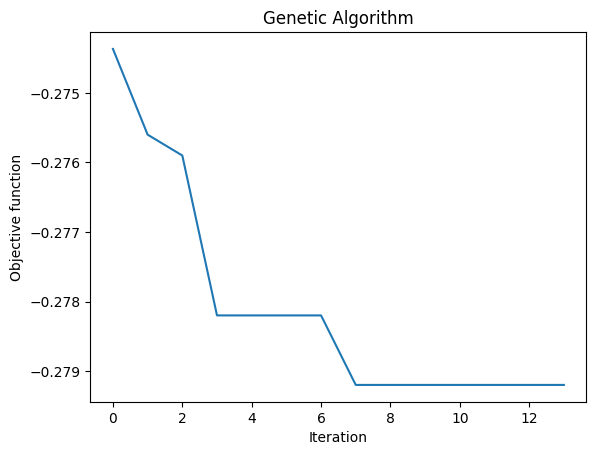

In [6]:
evo_start_time = time.time()    

model.run()

evo_end_time = time.time()
evo_execution_time = evo_end_time - evo_start_time
evo_execution_time_delta = timedelta(seconds=evo_execution_time)
print(str(evo_execution_time_delta))

In [7]:
solution=model.output_dict
rule_priorities = solution['variable']
sorted_rules = rearrange_rules_by_priority(rule_priorities, rules)

# Display the best solution
print(sorted_rules)

# Writing to a file
file_path = 'rules_priority.best.TOTAL.txt'
with open(file_path, 'w') as file:
    for rule in sorted_rules:
        file.write(f"{rule}\n")

['TN', 'oNX', '{', 'ZN', 'c', 't', '[', 'r', 'u', ']', 'l', '$X', 'sXY', '}', 'iNX', '^X', 'DN', 'zN']


In [8]:
model.report

[-0.27436666666666665,
 -0.2756,
 -0.2759,
 -0.2782,
 -0.2782,
 -0.2782,
 -0.2782,
 -0.27919999999999995,
 -0.27919999999999995,
 -0.27919999999999995,
 -0.27919999999999995,
 -0.27919999999999995,
 -0.27919999999999995,
 -0.27919999999999995]